# Data Scientist Take-home Challenge

You are given 2 input files - **data.csv** and **target.csv**. Each row in `data.csv` belongs to a *measurement* and each column represents a feature. For each row in `data.csv` you have  a corresponding class label in `target.csv`. You can consider the row-numbers as keys.

Your submission will be judged on a compound evaluation of your approach, code quality and results. Note that for open-ended tasks we give much more weight to a well-justified approach, rather than to complete results.

# Task 1

Define a set of possible classifiers and show which one performs best. Watch out not to overfit. 

### import libs

In [54]:
import pandas as pd
from numpy import load
import os
import numpy as np
import tensorflow as tf
import cv2
import numpy as np
import os
from datetime import datetime

# Import libraries and classes required for this example:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



### set project basepath

In [4]:
basepath = r"C:\Users\pascs\OneDrive\Desktop\Coding_Challenge"

### read csvs

In [11]:
df_data = pd.read_csv(os.path.join(basepath, "Easy_2", "Data", "data.csv"), header=None, sep= " ")
df_target = pd.read_csv(os.path.join(basepath, "Easy_2", "Data", "target.csv"), header=None)
print(df_target.iloc[:5])
print(df_data.iloc[:5])

     0
0  1.0
1  1.0
2  0.0
3  0.0
4  1.0
        0          1         2         3         4         5         6    \
0 -0.917557  19.607577 -0.554645 -0.070190  0.574078  1.171912 -0.016990   
1  1.405869  21.515231 -1.511844 -0.586124  2.423895  0.775196 -0.415505   
2 -0.389747  20.692381 -0.356724  1.210862 -0.897038  0.987663  0.131566   
3 -0.572894  20.690381  0.529177  0.096562 -0.805788  1.265500 -1.009898   
4 -0.009104  18.678118  0.936631  0.091671 -2.187237  1.179908 -0.711491   

        7         8         9    ...       120       121       122       123  \
0 -0.714198 -0.018138  0.577242  ...  0.693705 -1.087513 -0.046509  0.105504   
1 -0.671892 -0.655684  2.210577  ... -0.085963  0.072455  1.306949 -0.728437   
2 -0.180066  0.544777 -1.064934  ... -0.816699 -1.518435 -0.630022  1.271507   
3 -1.122972 -1.176405 -0.980322  ...  0.975383  0.085923 -0.932246  0.874500   
4 -0.648111  0.136265  0.830598  ...  0.145059  0.290151 -1.186000 -0.984330   

        124       12

### Train Test Split

In [21]:
X = df_data
y= df_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 / 8, shuffle=False)

### Standardize features by removing mean and scaling to unit variance:

In [24]:
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### KNN (K-Nearest-NeighborClassifier):

Initilaize Classifier

In [30]:
classifier = KNeighborsClassifier(n_neighbors=5)

Fit Classifier

In [31]:
classifier.fit(X_train, y_train)

C:\Users\pascs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

Predict and print Test Report

In [43]:
y_predict_KNN = classifier.predict(X_test)
print(confusion_matrix(y_test, y_predict_KNN))
print(classification_report(y_test, y_predict_KNN))
print(accuracy_score(y_test, y_predict_KNN))

[[494 124]
 [141 491]]
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       618
         1.0       0.80      0.78      0.79       632

    accuracy                           0.79      1250
   macro avg       0.79      0.79      0.79      1250
weighted avg       0.79      0.79      0.79      1250

0.788


### Naive Bayes Classifier

Initilaize Classifier

In [41]:
gnb = GaussianNB()

In [42]:
model = gnb.fit(X_train, y_train)
# Make predictions with the classifier:
y_pred_gnb = gnb.predict(X_test)
print(classification_report(y_test, y_pred_gnb))
print(accuracy_score(y_test, y_pred_gnb))

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       618
         1.0       0.83      0.81      0.82       632

    accuracy                           0.82      1250
   macro avg       0.82      0.82      0.82      1250
weighted avg       0.82      0.82      0.82      1250

0.8232


C:\Users\pascs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Neural Network with Tensorflow

Initilaize Model, compile and fit.

In [87]:
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_tf.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.00001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    ]
)
history = model_tf.fit(X_train, y_train, epochs=20, validation_data =(X_test, y_test) )

Epoch 1/20


C:\Users\pascs\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


274/274 [==============================] - 1s 3ms/step - loss: 0.6893 - accuracy: 0.5314 - val_loss: 0.6658 - val_accuracy: 0.6072
Epoch 2/20
274/274 [==============================] - 1s 2ms/step - loss: 0.6438 - accuracy: 0.6593 - val_loss: 0.6250 - val_accuracy: 0.6704
Epoch 3/20
274/274 [==============================] - 1s 2ms/step - loss: 0.6054 - accuracy: 0.7167 - val_loss: 0.5895 - val_accuracy: 0.7120
Epoch 4/20
274/274 [==============================] - 1s 2ms/step - loss: 0.5712 - accuracy: 0.7401 - val_loss: 0.5594 - val_accuracy: 0.7312
Epoch 5/20
274/274 [==============================] - 1s 2ms/step - loss: 0.5417 - accuracy: 0.7583 - val_loss: 0.5341 - val_accuracy: 0.7440
Epoch 6/20
274/274 [==============================] - 1s 2ms/step - loss: 0.5174 - accuracy: 0.7721 - val_loss: 0.5140 - val_accuracy: 0.7520
Epoch 7/20
274/274 [==============================] - 1s 2ms/step - loss: 0.4974 - accuracy: 0.7835 - val_loss: 0.4990 - val_accuracy: 0.7568
Epoch 8/20
274/27

In [88]:
y_pred_tf = model_tf.predict(X_test)
y_pred_tf = [
    1 if prob > 0.5 else 0 for prob in np.ravel(y_pred_tf)
]
y_pred_tf
print(classification_report(y_test, y_pred_tf))
print(accuracy_score(y_test, y_pred_tf))

40/40 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       618
         1.0       0.82      0.84      0.83       632

    accuracy                           0.83      1250
   macro avg       0.83      0.83      0.83      1250
weighted avg       0.83      0.83      0.83      1250

0.8272


Plot Loss Curve NN Tensorflow

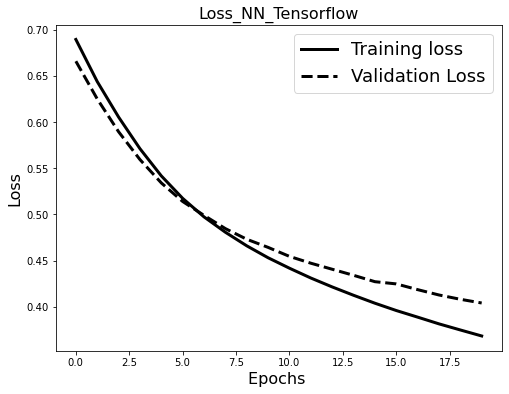

In [92]:
plt.figure(figsize=[8,6])
plt.title('Loss_NN_Tensorflow',fontsize=16)
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.show()

Plot Accuracy Curve NN Tensorflow

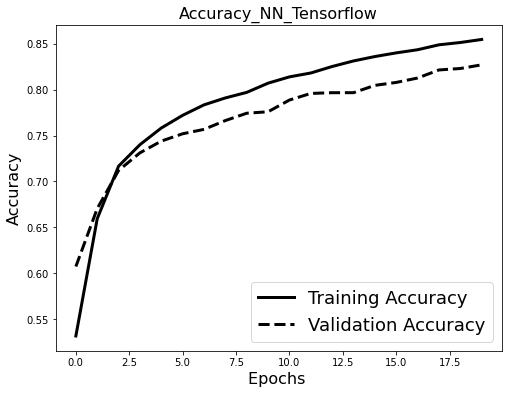

In [94]:
plt.figure(figsize=[8,6])
plt.title('Accuracy_NN_Tensorflow',fontsize=16)
plt.plot(history.history['accuracy'],'black',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18,
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.show()

The Accuracy of the Training and Validation set are matching. Therfore the Model doesn't overfit.

## Comparison Accuracy of the 3 Model Approaches

In [89]:
print("Accuracy K-Nearest Neighbor       : ",accuracy_score(y_test, y_predict_KNN))
print("Accuracy Gaussian Naive Bayes     : ",accuracy_score(y_test, y_pred_gnb))
print("Accuracy Neural Network Tensorflow: ",accuracy_score(y_test, y_pred_tf))

Accuracy K-Nearest Neighbor       :  0.788
Accuracy Gaussian Naive Bayes     :  0.8232
Accuracy Neural Network Tensorflow:  0.8272


# Task 2

Try to reduce the number of features. In the dataset you have over 100 features. Find the good ones for your classifier.

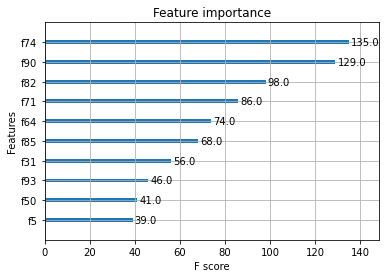

In [98]:
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
plot_importance(xgb, max_num_features= 10)
plt.show()